In [1]:
import pandas as pd
import sys 
import seaborn as sns
import matplotlib.pyplot as plt
sys.path.extend(['../../'])

from analysis.utils import read_result, combine_result

sns.set_theme(style="darkgrid")
sns.set(rc={'figure.figsize':(10,7)})
sns.set_context()
sns.set_palette("tab10")

In [2]:
df_rasdaman_local = read_result("../../benchmark_results/rasdaman_local/visualization_stats_history.csv")
df_rasdaman_proxy = read_result("../../benchmark_results/rasdaman/visualization_stats_history.csv")
df_rastless = read_result("../../benchmark_results/rastless/visualization_stats_history.csv")

In [3]:
df_rasdaman_local.head()

,User Count,Requests/s,Failures/s,50%,66%,75%,80%,90%,95%,98%,...,99.9%,99.99%,100%,Total Request Count,Total Failure Count,Total Median Response Time,Total Average Response Time,Total Min Response Time,Total Max Response Time,Total Average Content Size
Elapsed Time [s],,,,,,,,,,,,,,,,,,,,,
0.0,0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0,0,0.0,0.000000,0.000000,0.000000,0.000000
1.0,1,0.0,0.0,500.0,500.0,500.0,500.0,500.0,500.0,500.0,...,500.0,500.0,500.0,2,0,410.0,453.894210,407.195485,500.592935,6708.500000
2.0,2,0.0,0.0,650.0,650.0,720.0,720.0,720.0,720.0,720.0,...,720.0,720.0,720.0,4,0,500.0,569.346265,407.195485,716.752749,12044.000000
3.0,3,1.0,0.0,430.0,430.0,500.0,500.0,650.0,720.0,720.0,...,720.0,720.0,720.0,12,0,410.0,464.198681,364.158333,716.752749,8336.750000
4.0,4,1.0,0.0,410.0,410.0,430.0,450.0,560.0,650.0,720.0,...,720.0,720.0,720.0,22,0,410.0,434.843381,318.843449,716.752749,8412.727273


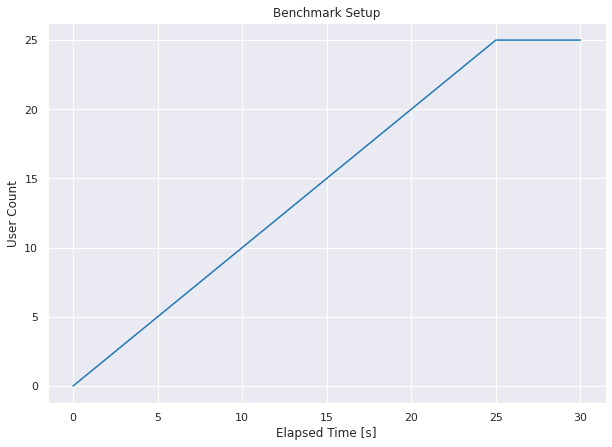

In [4]:
ax = sns.lineplot(data=df_rasdaman_local, x=df_rasdaman_local.index, y="User Count")
ax.set_title('Benchmark Setup')
plt.savefig("./result_images/user_count.pdf")

In [5]:
df_median_response = combine_result(df_rastless, df_rasdaman_proxy, df_rasdaman_local, "Total Median Response Time")

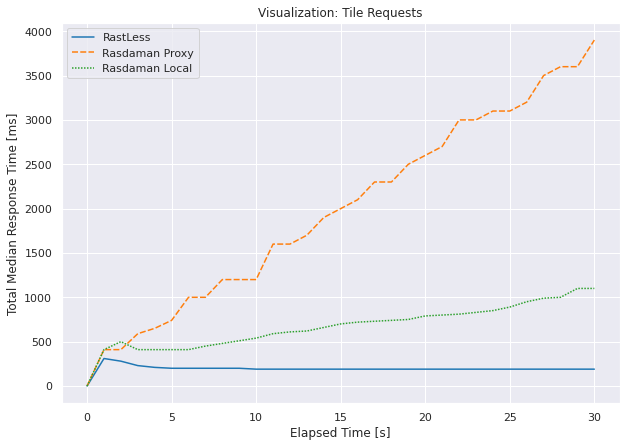

In [6]:
ax = sns.lineplot(data=df_median_response)
ax.set(ylabel='Total Median Response Time [ms]')
ax.set_title('Visualization: Tile Requests')
plt.savefig("./result_images/total_median_response_time.pdf")

In [7]:
df_request_s = combine_result(df_rastless, df_rasdaman_proxy, df_rasdaman_local, "Requests/s")

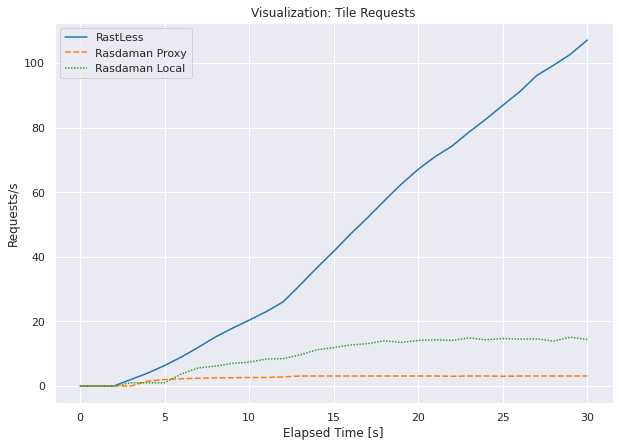

In [8]:
ax = sns.lineplot(data=df_request_s)
ax.set(ylabel='Requests/s')
ax.set_title('Visualization: Tile Requests')
plt.savefig("./result_images/requests_per_second.pdf")

In [9]:
df_request_total_count = combine_result(df_rastless, df_rasdaman_proxy, df_rasdaman_local, "Total Request Count")

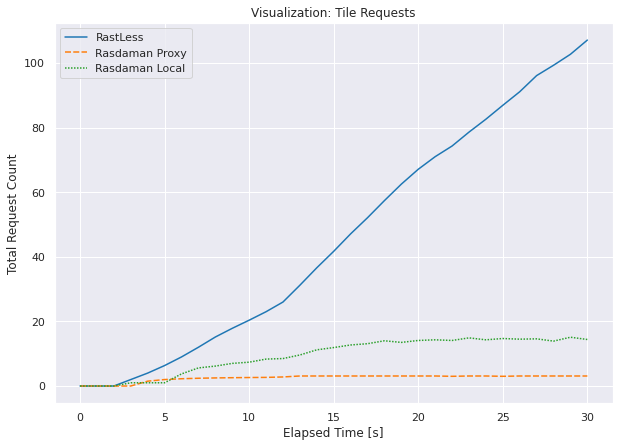

In [10]:
ax = sns.lineplot(data=df_request_s)
ax.set(ylabel="Total Request Count")
ax.set_title('Visualization: Tile Requests')
plt.savefig("./result_images/total_request_count.pdf")

Text(0.5, 1.0, 'RastLess: Response Time')

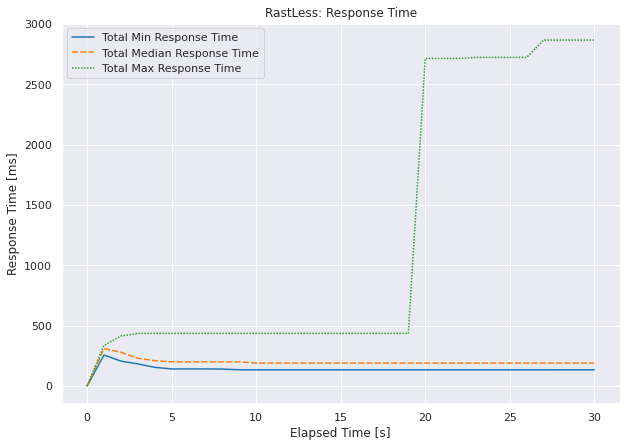

In [11]:
ax = sns.lineplot(data=df_rastless[["Total Min Response Time", "Total Median Response Time", "Total Max Response Time"]])
ax.set(ylabel="Response Time [ms]")
ax.set_title('RastLess: Response Time')

Text(0.5, 1.0, 'RastLess: Response Time')

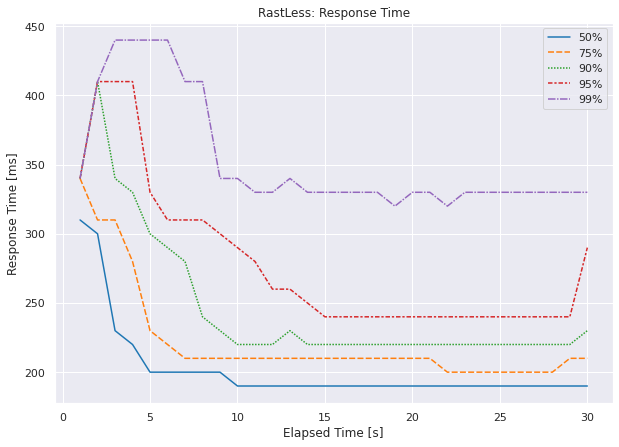

In [12]:
ax = sns.lineplot(data=df_rastless[["50%", "75%", "90%", "95%", "99%"]])
ax.set(ylabel="Response Time [ms]")
ax.set_title('RastLess: Response Time')

Text(0.5, 1.0, 'Rasdaman Local: Response Time')

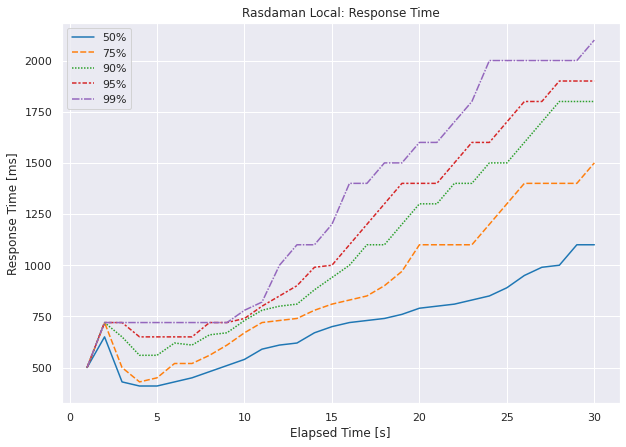

In [13]:
ax = sns.lineplot(data=df_rasdaman_local[["50%", "75%", "90%", "95%", "99%"]])
ax.set(ylabel="Response Time [ms]")
ax.set_title('Rasdaman Local: Response Time')